# Fordgobike-Tripdata Explaination
# Productivity of ages and types of them.

## the main key insight is which age or ages more productive?

### import packages

In [1]:
# import all packages and set plots to be embedded inline.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### fit size and color

In [2]:
#to fit all figures as the same size.
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10

#to fit all figures as the same color
base_color = sb.color_palette()[0]

### load and handle data (data wrangling)

In [3]:
# load in the dataset into a pandas dataframe, print statistics.
df = pd.read_csv("201902-fordgobike-tripdata.csv")

#fill null values with mean().
df['member_birth_year'].fillna(df['member_birth_year'].mean(), inplace = True)

# fill null values which is Unknown with the name of it.
df['member_gender'].fillna('Unknown', inplace = True)

# fill null values with insight to get the location.
df.fillna('latitude_longitude', inplace = True)

### get column age

In [4]:
# creat column age from substracting 2019 from column member_birth_year
df['age'] = 2019 - df['member_birth_year']

### Explore users Ages

In [5]:
# describe column age
df.age.describe()

count    183412.000000
mean         34.193563
std           9.886118
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max         141.000000
Name: age, dtype: float64

In [6]:
# describe counts of every age
df['age'].value_counts().describe()

count       76.000000
mean      2413.315789
std       3022.788660
min          1.000000
25%         52.500000
50%       1070.000000
75%       3549.750000
max      10236.000000
Name: age, dtype: float64

## which age or ages more frequent?
when we count ages we find that age 31 is the most frequent with 10236 user,<br>
and then 26 years old with 9325 user and then 30 with 8972 , 29 with 8658 <br>
31, 26, 30 is more frequent than others 

In [7]:
#get counts of every age
df['age'].value_counts().head()

31.0    10236
26.0     9325
30.0     8972
29.0     8658
28.0     8498
Name: age, dtype: int64

In [8]:
# get table with counts
count_age = df['age'].value_counts()
#set index
count_age = count_age.reset_index()
#rename columns
count_age = count_age.rename(columns = {'index':'age', 'age':'sum of values'})

In [9]:
#get only data counts ages greater than or equal 8498 people
visual_1 = count_age[count_age["sum of values"] >= 8498]

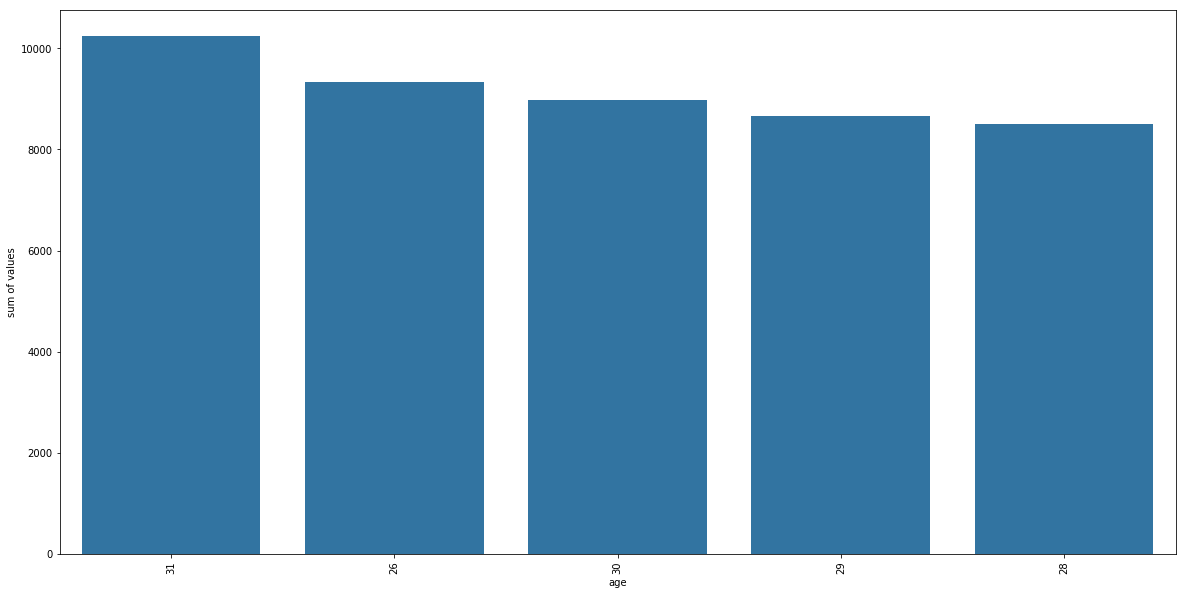

In [10]:
#count values of ages and shape of it.
order = [31, 26, 30, 29, 28]
sb.barplot(data = visual_1, x = 'age', y='sum of values', color = base_color, order=order);
#rotate words in degree to be readable
plt.xticks(rotation = 90);

# which age or ages we need to care about in frequent or which less frequent?

alot of ages we need to care about if it more productive than others in another side.

In [11]:
# creat visual_2 data about counts less than 100 people
visual_2 = count_age[count_age['sum of values'] < 100]

In [12]:
# view top 5 rows of visual_2
visual_2.head()

,age,sum of values
54,70.0,99
55,88.0,89
56,119.0,53
57,71.0,51
58,18.0,34


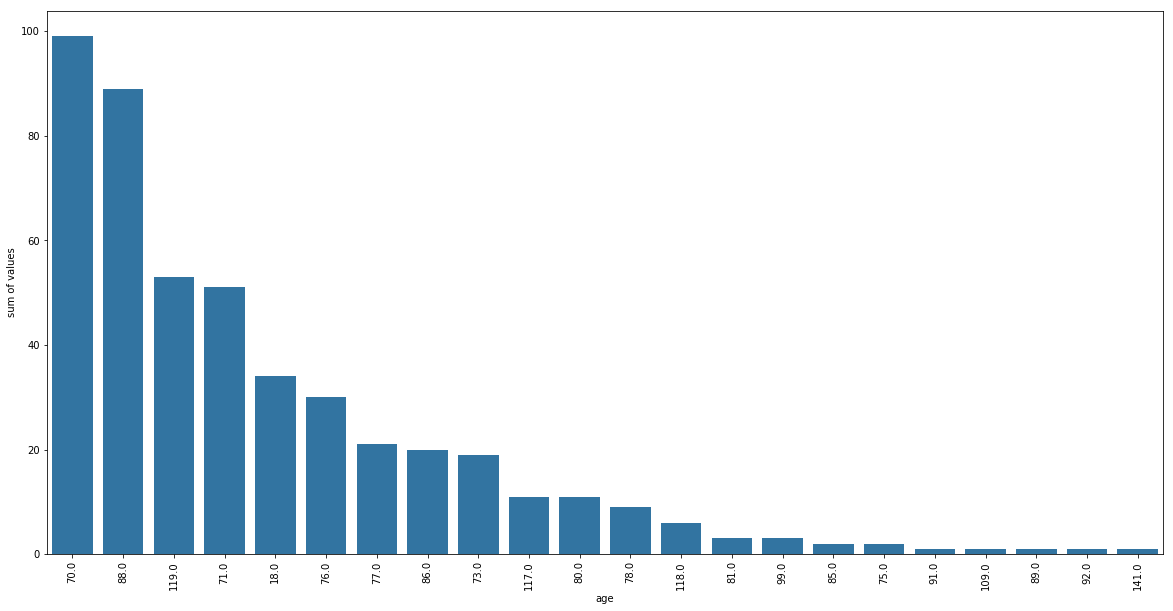

In [13]:
#count values of ages and shape of it.
order = visual_2['age']
sb.barplot(data = visual_2, x = 'age', y='sum of values', color = base_color, order=order);
#rotate words in degree to be readable
plt.xticks(rotation = 90);

the figure above is for ages with count less than 100 people.<br>
alot of ages we need to care about if it more productive than others in another side.<br>
ages counts less than 100 people  18 years old which is more productive in another side ,and<br>
76, 77, 86, 73, 117, 80, 78, 118, 81, 99, 85, 75, 91, 109, 89, 92, 141, 70, 88, 119, 71 years old

# which ages counts of it between mean and median ?

In [14]:
# mean and median 
count_age['sum of values'].median(), count_age['sum of values'].mean()

(1070.0, 2413.3157894736842)

In [15]:
#tables from counts above_1070 and above_2414 and between_1070_2414
above_1070 = count_age[count_age['sum of values'] >= 1070]

above_2414 = count_age[count_age['sum of values'] >= 2414]

between_1070_2414 = above_1070.drop(above_2414.index)

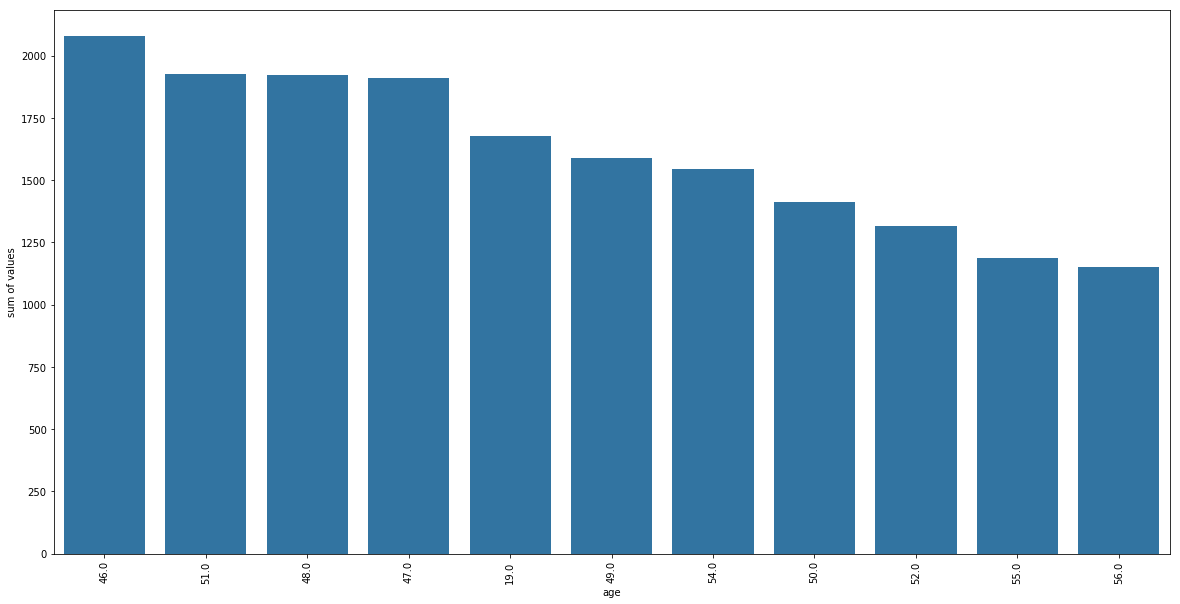

In [16]:
#count values of ages and shape of it.
order = between_1070_2414['age']
sb.barplot(data = between_1070_2414, x = 'age', y='sum of values', color = base_color, order=order);
#rotate words in degree to be readable
plt.xticks(rotation = 90);

counts between mean and median in this ages  19 , range ages 46:52 and range ages 54:56 

# is ages between mean and median far away from the top heighst ages?

In [17]:
# get all 3 data combined 
visual_3 = visual_1.append(between_1070_2414)
visual_3 = visual_3.append(visual_2)

# get all 3 findings : hieghst count ,  between mean and median , and   lowest count together in one figure.

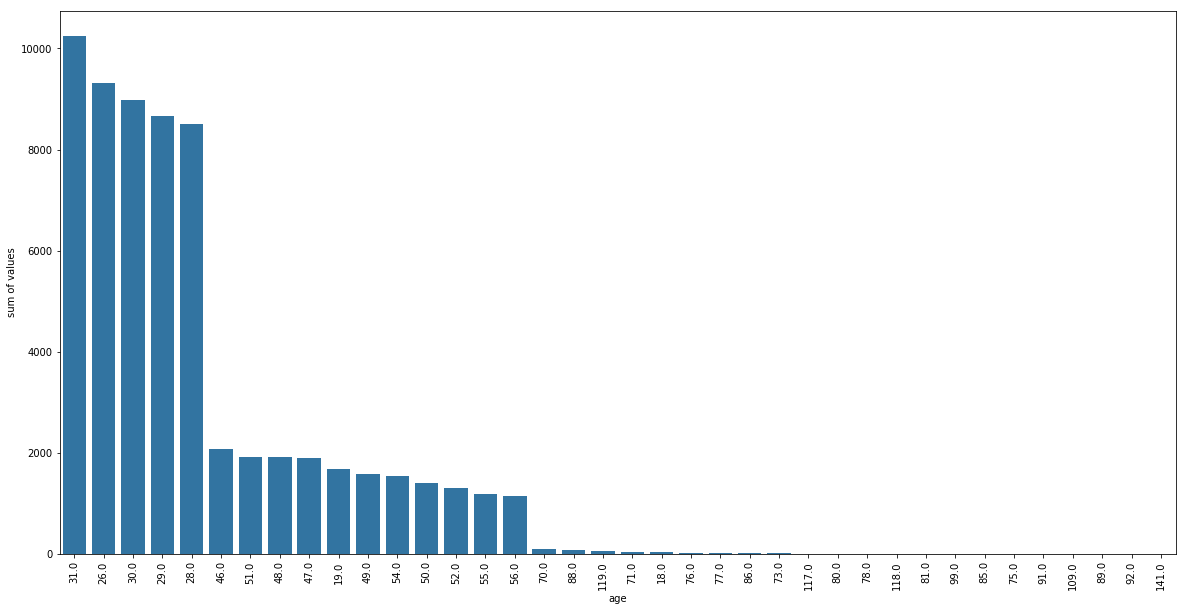

In [18]:
#count values of ages and shape of it.
order = visual_3['age']
sb.barplot(data = visual_3, x = 'age', y='sum of values', color = base_color, order=order);
#rotate words in degree to be readable
plt.xticks(rotation = 90);

the figure above determine that the top heighst counts more than 3 times <br>
the counts between mean and median <br>
that explain that we focus only in range ages  26 to 31 years old <br>
but we dont care about alot of data we need to care about

# the big picture

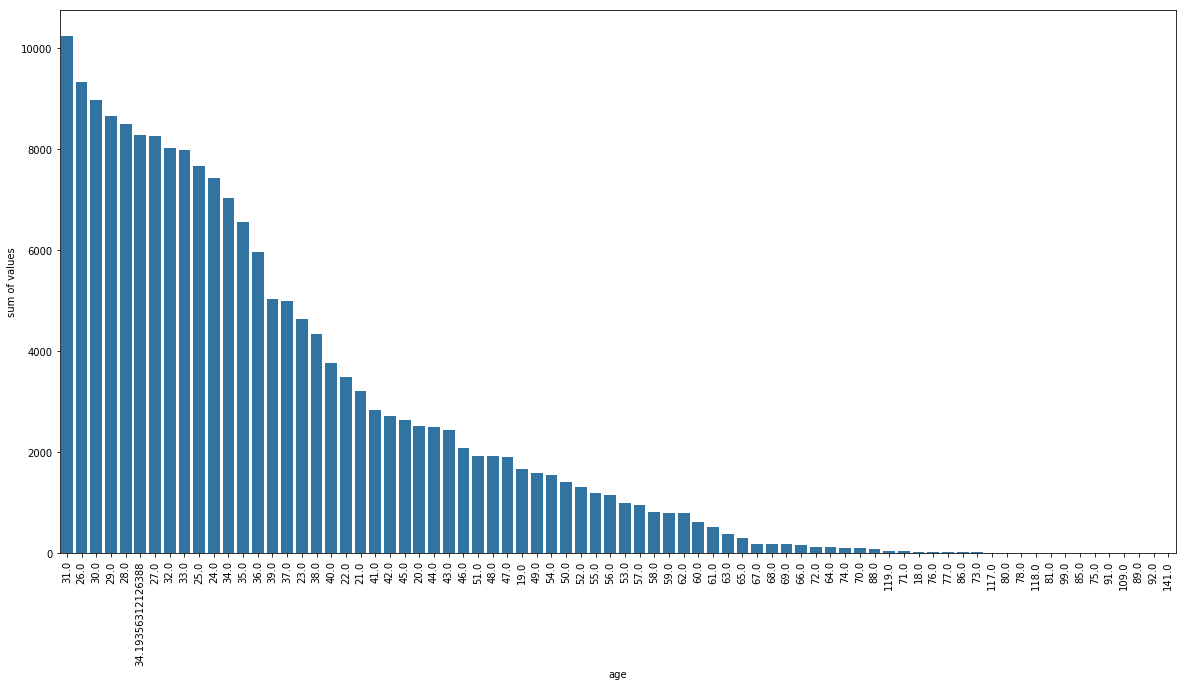

In [19]:
#count values of ages and shape of it.
order = df['age'].value_counts().index
sb.barplot(data = count_age, x = 'age', y='sum of values', color = base_color, order=order);
#rotate words in degree to be readable
plt.xticks(rotation = 90);

the figure above determine all counts to ages in all data.

# what is the shape of count of ages in all data sorted by ages?

### visualization

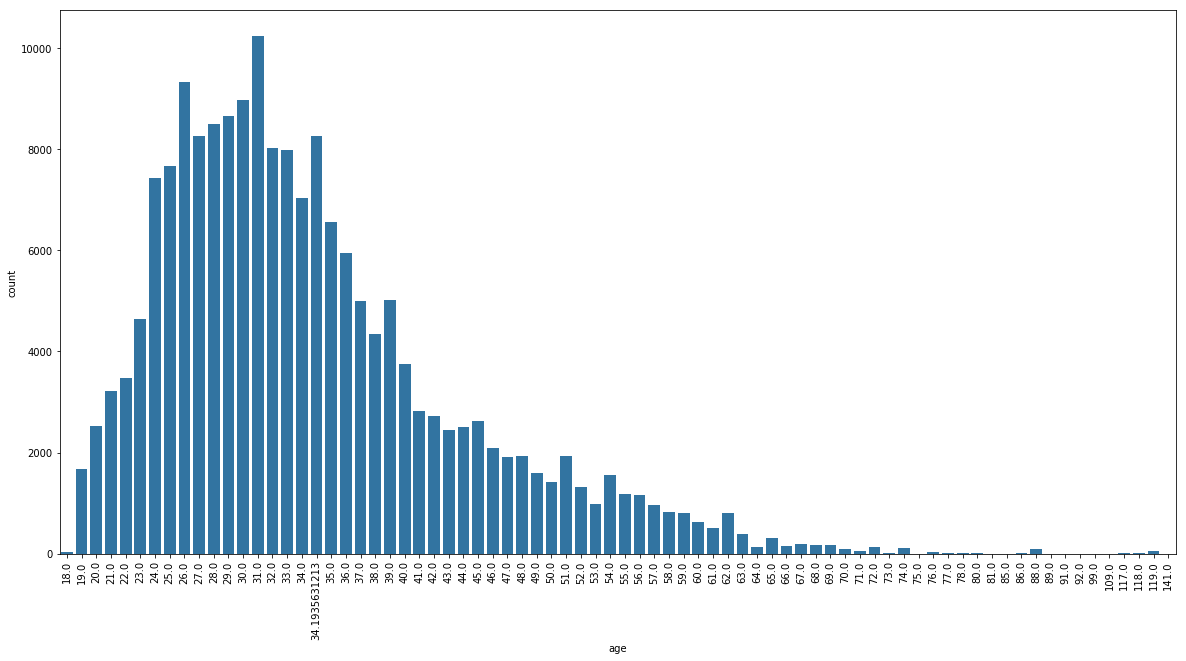

In [20]:
#count values of ages and shape of it.
sb.countplot(data = df, x = 'age', color = base_color);
#rotate words in degree to be readable
plt.xticks(rotation = 90);

the shape of data is right skewd from age 18 to 141 the average of ages is 34 years old.
count of age increase from 18 to 31 and then decrease.

# what ages counts of it above mean ?<br>
# and what ages counts of it above median?

In [23]:
#table of counts above or equal 2413 
above_mean = count_age[count_age["sum of values"] >= 2413]

#table of counts above or equal 1070
above_median = count_age[count_age["sum of values"] >= 1070]

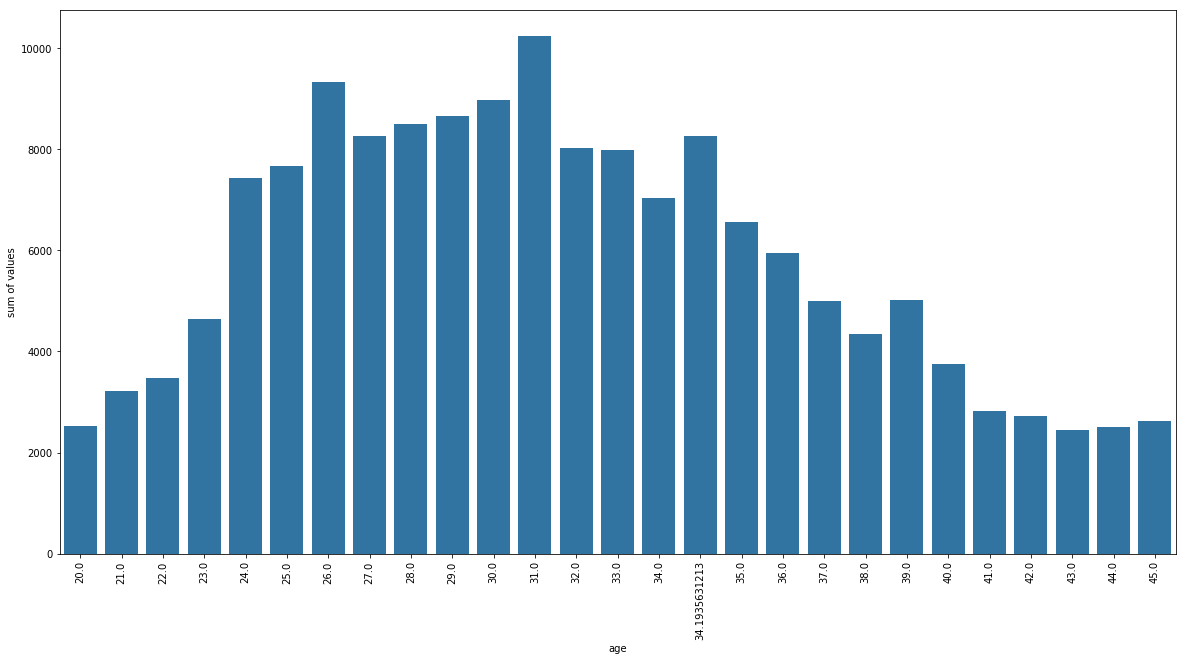

In [24]:
#barplot of table above_mean columns age and sum of values
sb.barplot(data = above_mean, x = 'age', y='sum of values', color = base_color);
plt.xticks(rotation = 90);

range ages above mean from 20 to 45 years old.

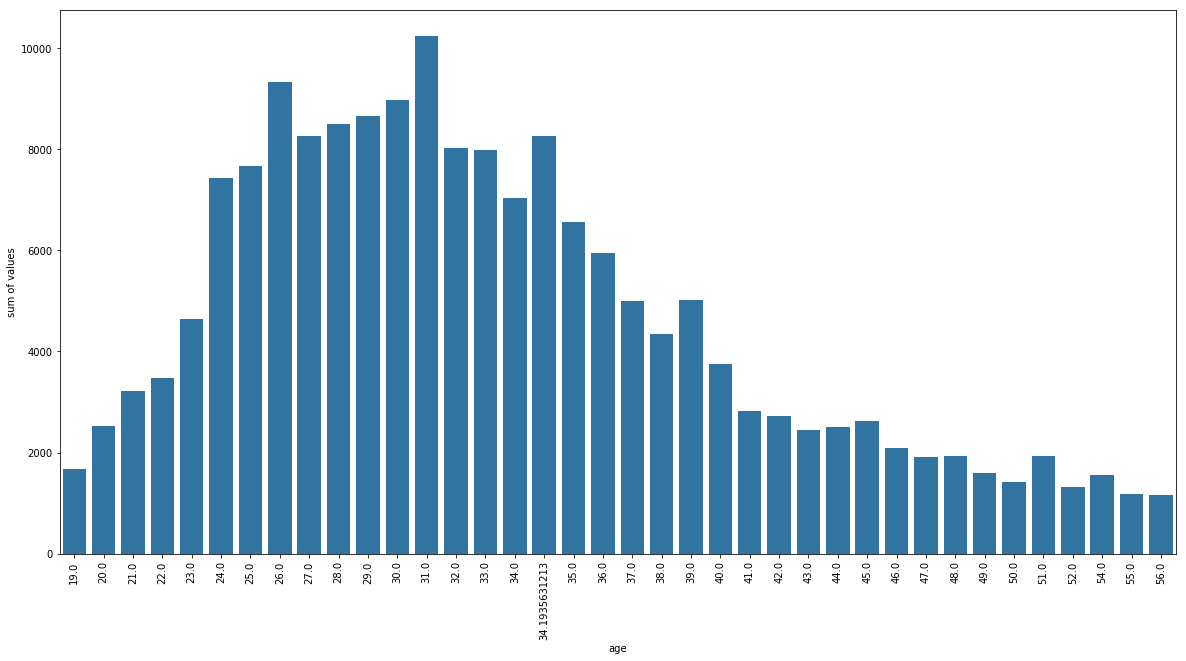

In [25]:
sb.barplot(data = above_median, x = 'age', y='sum of values', color = base_color);
plt.xticks(rotation = 90);

range ages above median from 19 to 56 where the destribution is right skewd more than mean.

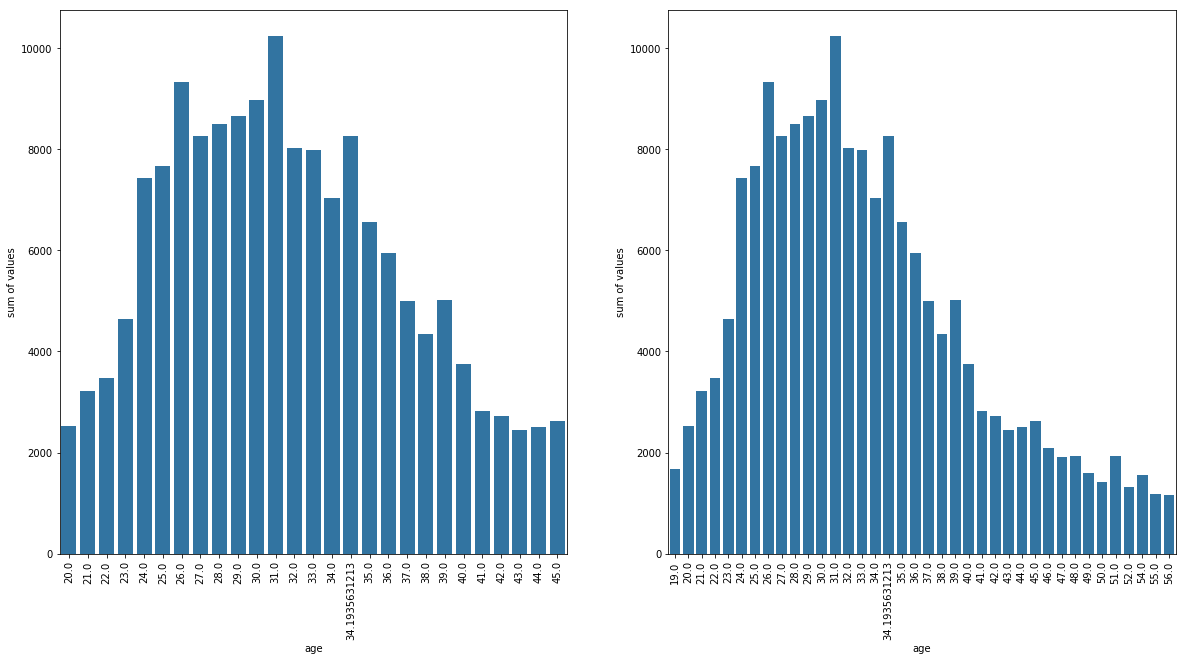

In [26]:
# first shape (1,2,1)
plt.subplot(1,2,1)
sb.barplot(data = above_mean, x = 'age', y='sum of values', color = base_color);
plt.xticks(rotation = 90);

#second shape (1,2,2)
plt.subplot(1,2,2)
sb.barplot(data = above_median, x = 'age', y='sum of values', color = base_color);
plt.xticks(rotation = 90);

# which range of ages is compine most the data ?

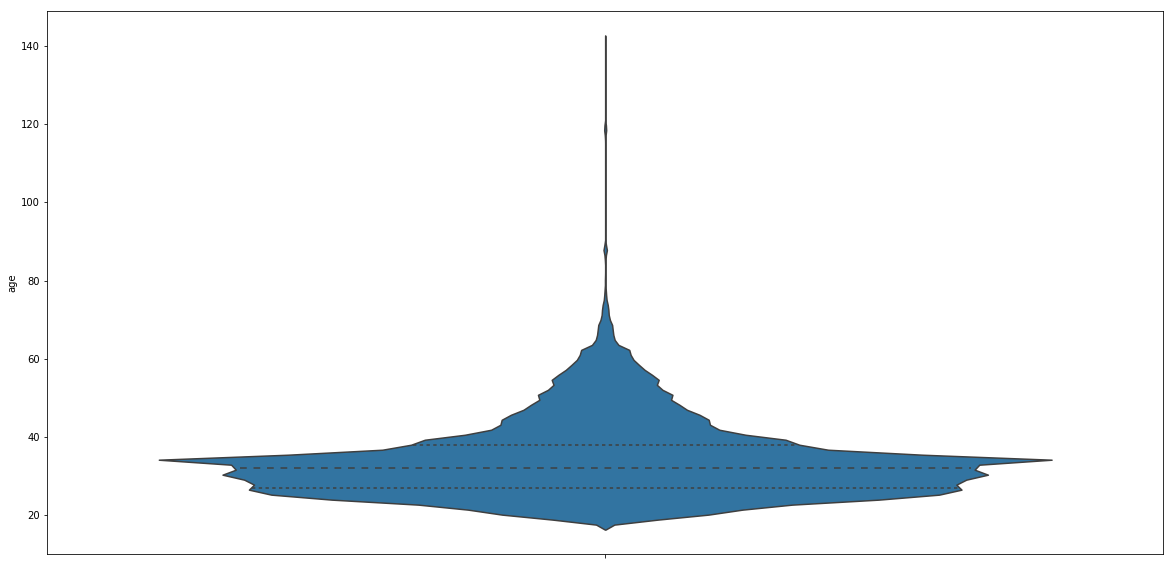

In [27]:
#violin plot with quartile ranges
sb.violinplot(data = df, y = 'age', color = base_color, inner = 'quartile');
plt.xticks(rotation = 90);

approxemately all the data compined above age 17 years old and under age 41 years old.

# what is the proportion of Top 5 ages count people?

### sum counts of top 5 counts

In [29]:
df['age'].value_counts().head().sum()

45689

### sum counts of all data

In [30]:
df['age'].value_counts().sum()

183412

In [31]:
count_age['sum of values'].sum()

183412

### proportion of top 5 ages 

In [32]:
df['age'].value_counts().head().sum() / count_age['sum of values'].sum()

0.24910583822214469

approxemately 25% of this data in only 5 ages which are 26 years old and range from 28 years old to 31 years old.

# we know now 25% of counts what about 50%, 75%, 90% ?

In [33]:
top_05 = df['age'].value_counts().head()
top_11 = df['age'].value_counts().head(11)
top_20 = df['age'].value_counts().head(20)
top_31 = df['age'].value_counts().head(31)

top_05 = top_05.reset_index()
top_11 = top_11.reset_index()
top_20 = top_20.reset_index()
top_31 = top_31.reset_index()

top_05 = top_05.rename(columns = {'index':'age', 'age':'sum of values'})
top_11 = top_11.rename(columns = {'index':'age', 'age':'sum of values'})
top_20 = top_20.rename(columns = {'index':'age', 'age':'sum of values'})
top_31 = top_31.rename(columns = {'index':'age', 'age':'sum of values'})

In [34]:
print(top_05['sum of values'].sum() / count_age['sum of values'].sum())
print(top_11['sum of values'].sum() / count_age['sum of values'].sum())
print(top_20['sum of values'].sum() / count_age['sum of values'].sum())
print(top_31['sum of values'].sum() / count_age['sum of values'].sum())

0.249105838222
0.508570867773
0.758172856738
0.903801277997


proportions of data 24.9%, 50.8%, 75.8%, and 90.3%

In [35]:
print(top_05['age'].min(), top_05['age'].max())
print(top_11['age'].min(), top_11['age'].max())
print(top_20['age'].min(), top_20['age'].max())
print(top_31['age'].min(), top_31['age'].max())

26.0 31.0
24.0 34.1935631213
22.0 40.0
20.0 51.0


range ages of this proportions respectivly.

25% of data in this ages {26, [28 : 31]}<br>
50% of data between 24 years old and 34 years old.<br>
75% of data between 22 years old and 40 years old.<br>
90% of data between 20 years old and 51 years old.<br>
90% of data from 20 to 48 years old and 51 years old.

# if there any groups of ages seems to be like each other?

In [36]:
count_age['sum of values'].value_counts().head(6)

1       5
807     2
2       2
3       2
11      2
2725    1
Name: sum of values, dtype: int64

In [40]:
count_age[count_age['sum of values'] == 11]

,age,sum of values
63,117.0,11
64,80.0,11


In [77]:
count_age[count_age['sum of values'] == 807]

,age,sum of values
41,59.0,807
42,62.0,807


### count counts if any count frequent as group of something every time

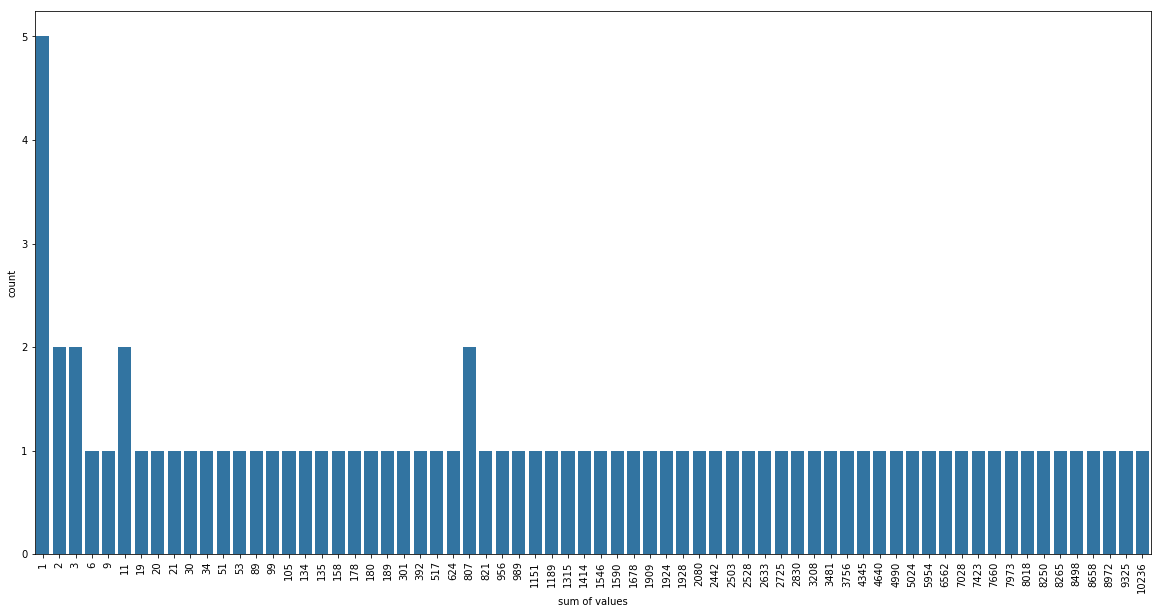

In [41]:
# count counts if any count frequent as group of something every time 
sb.countplot(data = count_age, x = 'sum of values', color = base_color);
plt.xticks(rotation = 90);

count 11 people for ages 117, 80 and count 807 people for ages 59, 62 years old.

# counts people whats the shape of it when we talk about range ages in this data?

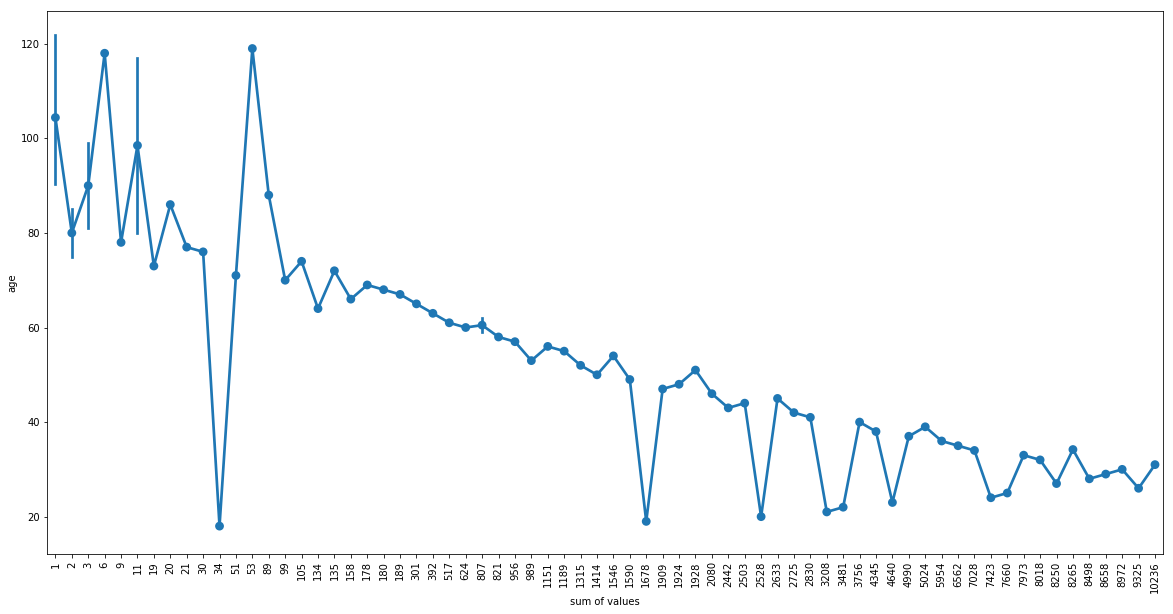

In [78]:
#barplot counts in ages 
sb.pointplot(data = count_age, x = 'sum of values',y='age', color = base_color);
plt.xticks(rotation = 90);

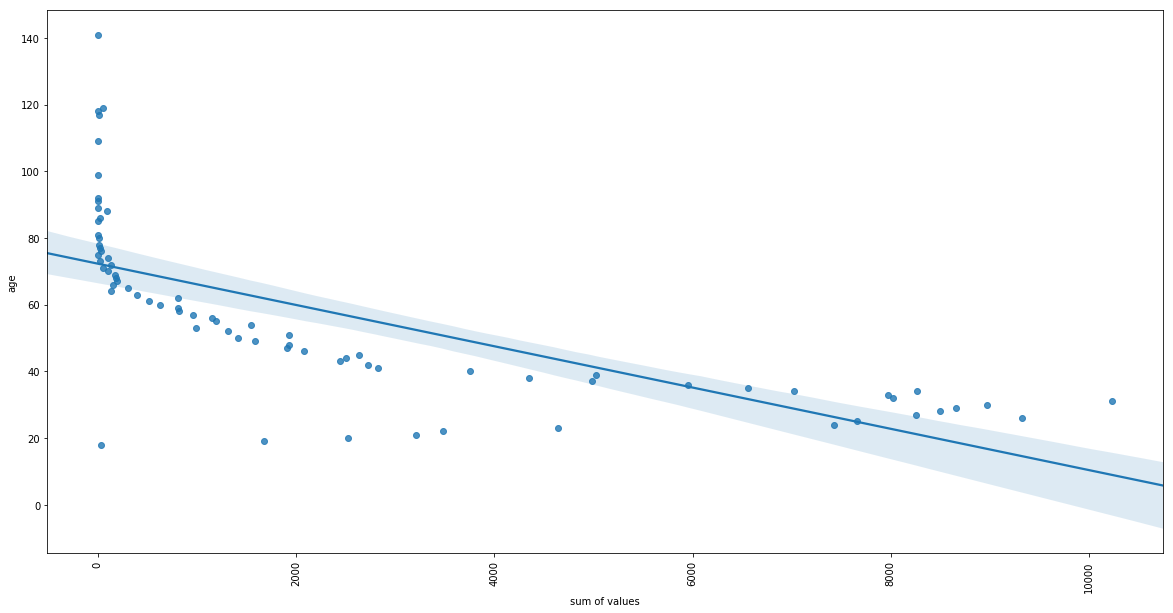

In [44]:
#scatterplot with slope
sb.regplot(data = count_age, x = 'sum of values',y='age', color = base_color);
plt.xticks(rotation = 90);

the shape above explain when the age increase the count of people in this age decrease.

# what range of ages in this data when we talk about counts?

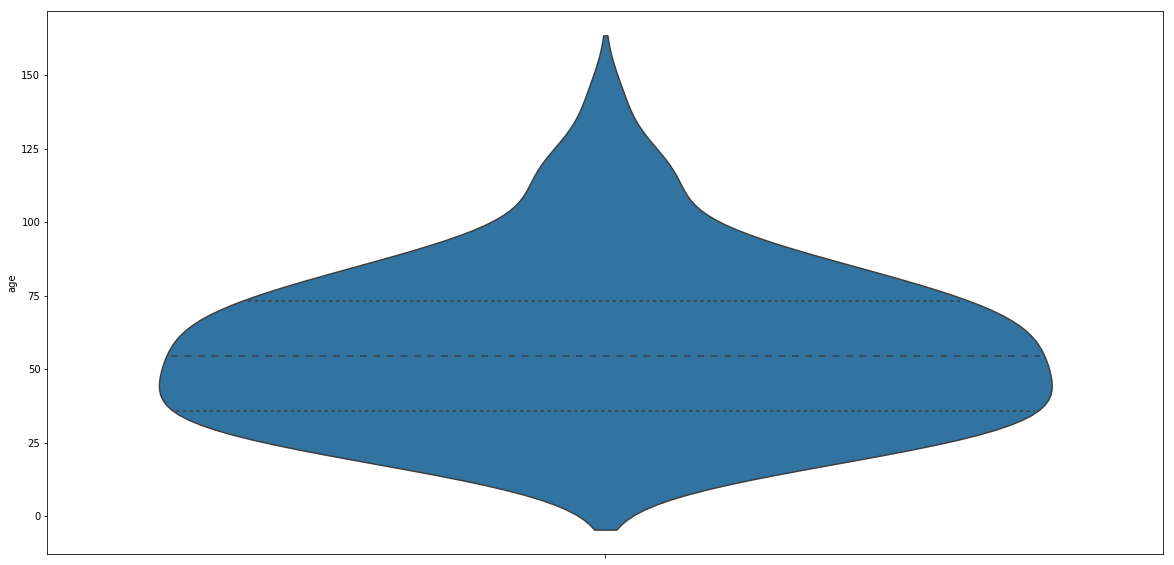

In [47]:
#violinplot 
sb.violinplot(data = count_age, y = 'age', color = base_color, inner = 'quartile');
plt.xticks(rotation = 90);

approxemately range of counts people between 20 and 80 years old.

# Bivariate

# which ages more productive in duration seconds?

Text(0,0.5,'duration of ride bike per/secand')

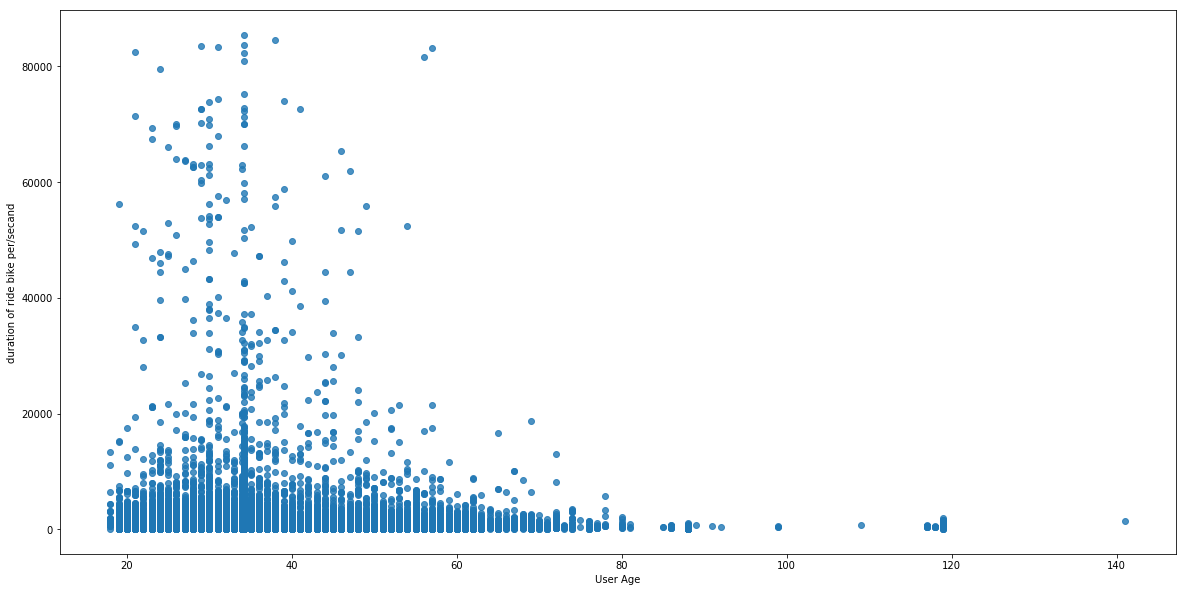

In [48]:
sb.regplot(data = df, x = 'age', y = 'duration_sec', fit_reg=False)
plt.xlabel('User Age')
plt.ylabel('duration of ride bike per/secand')

when we talk about duration second in this data approxemately more people between 18 and 65 years old. 

# what is the mean of duration second of every age?
# and why age 18 is more productive less count ?

In [49]:
df.query("age == 18")['duration_sec'].mean()

2444.9117647058824

In [50]:
df.query("age == 18")['duration_sec'].describe()

count       34.000000
mean      2444.911765
std       2829.019644
min         73.000000
25%        920.250000
50%       1608.500000
75%       2783.000000
max      13412.000000
Name: duration_sec, dtype: float64

Text(0,0.5,'duration of ride bike per/secand')

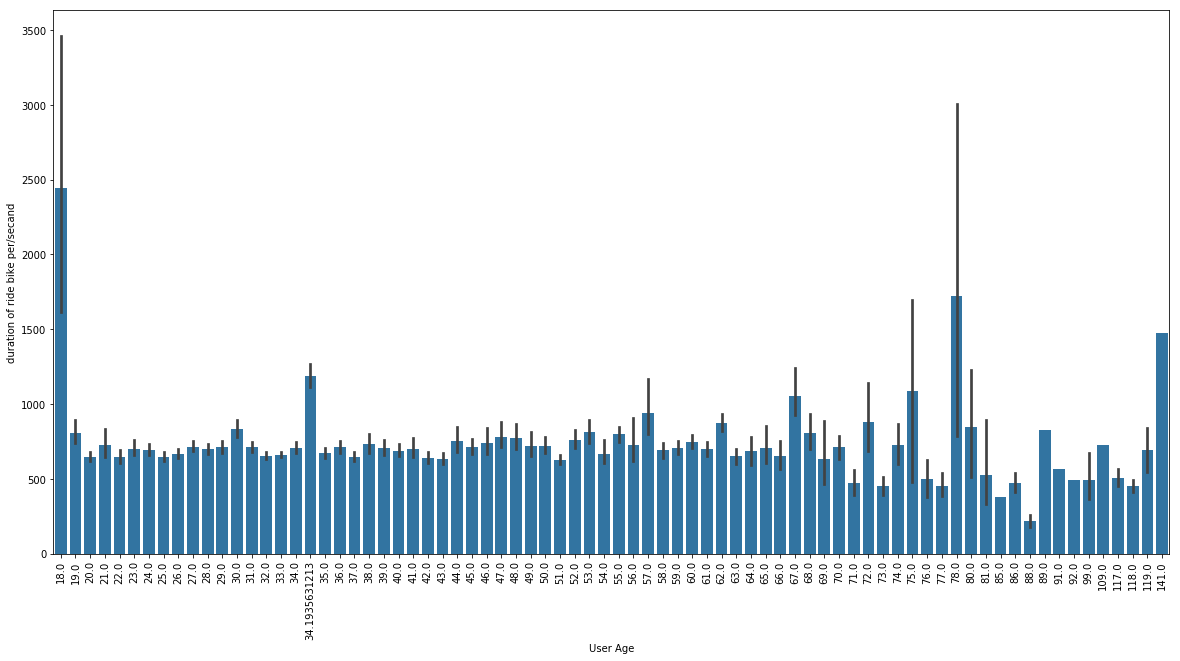

In [51]:
sb.barplot(data = df, x = 'age', y = 'duration_sec', color = base_color)
plt.xticks(rotation = 90)
plt.xlabel('User Age')
plt.ylabel('duration of ride bike per/secand')

In [52]:
count_age.query("age == 18")

,age,sum of values
58,18.0,34


average of age 18 years old is greater than others when we talk about duration sec.

when we want more duration second its important to focus on age 18 years old in our marketing.
because of average more productive in duration of second and now there only 34 person in this data.

# what count of duration second of every age? and what is the shape of it?

In [53]:
group_age = df.groupby(by="age")

In [54]:
count_age_duration = group_age['duration_sec'].sum()
count_age_duration = count_age_duration.drop(count_age_duration.index[17])
count_age_duration = count_age_duration.reset_index()

In [55]:
count_age_duration.head(3)

,age,duration_sec
0,18.0,83127
1,19.0,1351439
2,20.0,1636246


Text(0,0.5,'duration of ride bike per/secand')

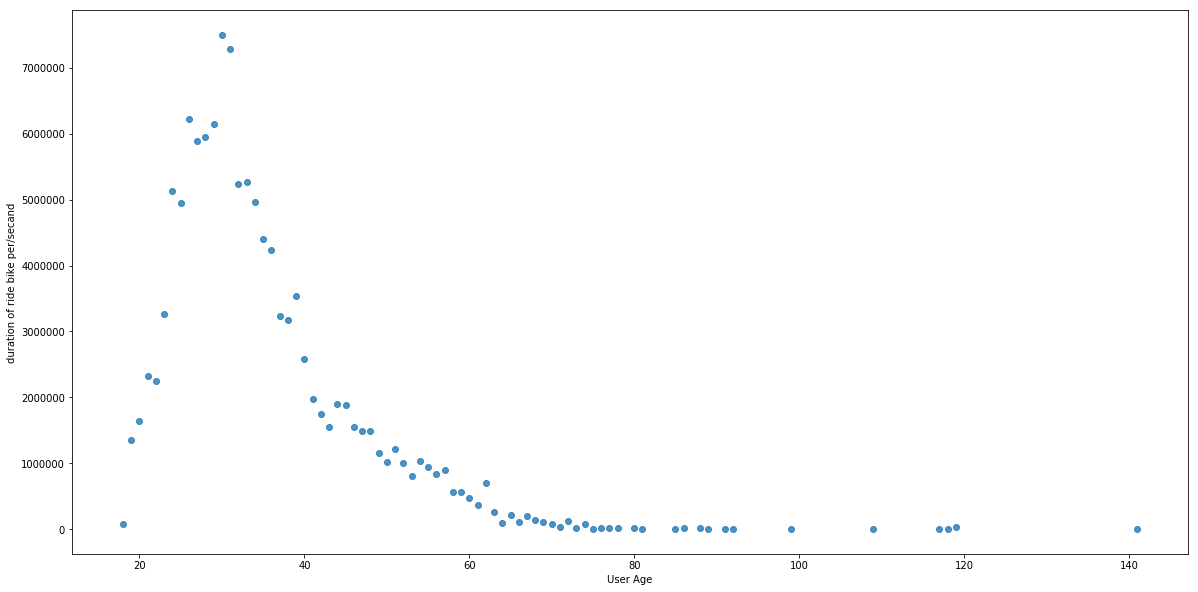

In [56]:
sb.regplot(data = count_age_duration, x = 'age', y = 'duration_sec', fit_reg=False)
plt.xlabel('User Age')
plt.ylabel('duration of ride bike per/secand')

the shape determine the counts of duration second of every age the shape is right skewd from fewest range ages to largest.

Text(0,0.5,'duration of ride bike per/secand')

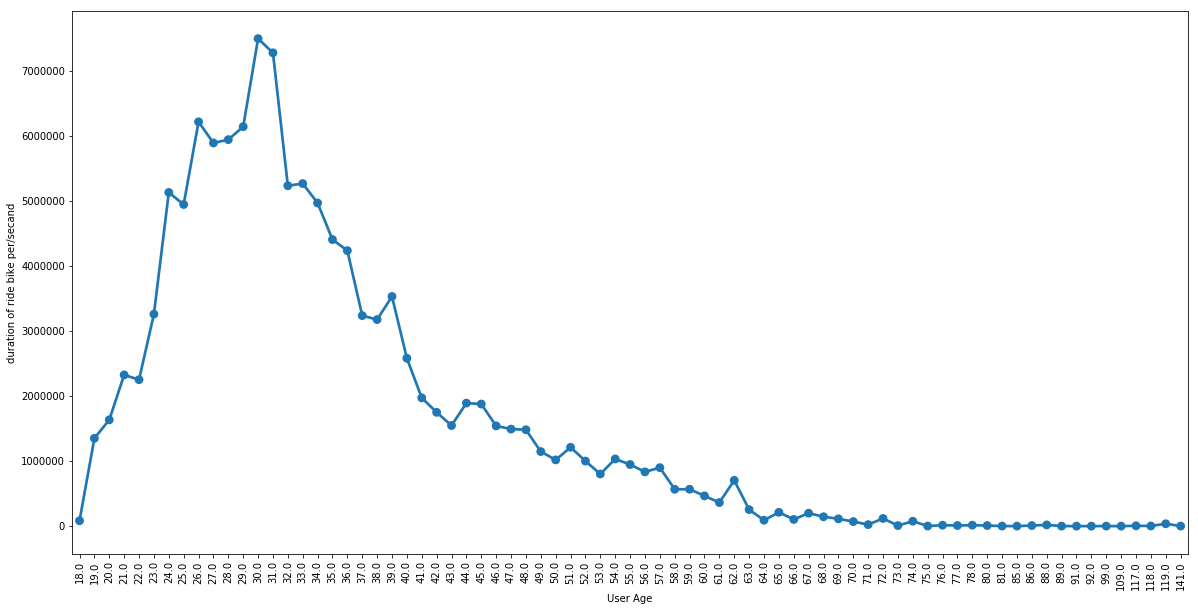

In [58]:
sb.pointplot(data = count_age_duration, x = 'age', y = 'duration_sec')
plt.xticks(rotation = 90)
plt.xlabel('User Age')
plt.ylabel('duration of ride bike per/secand')

count duration second is more between 19 and 48 years old from 48 to 63 years old decrease and then be few above 63 years old.

# what is porportion of top count duration for ages ?
# and what count duration more productive?

In [59]:
count_age_duration.sort_values('duration_sec', ascending=False).head(6)

,age,duration_sec
12,30.0,7500881
13,31.0,7282470
8,26.0,6220997
11,29.0,6146255
10,28.0,5946938
9,27.0,5895635


In [60]:
count_age_duration.sort_values('duration_sec', ascending=False).head(6).sum()

age                  171.0
duration_sec    38993176.0
dtype: float64

In [61]:
38993176 / count_age_duration['duration_sec'].sum()

0.31614228023163699

sum of duration better in this range of ages 26:31 years old which its porporthion of count duration_sec is 31.6% .

In [62]:
better_duration = count_age_duration.sort_values('duration_sec', ascending=False).head(6)

Text(0,0.5,'duration of ride bike per/secand')

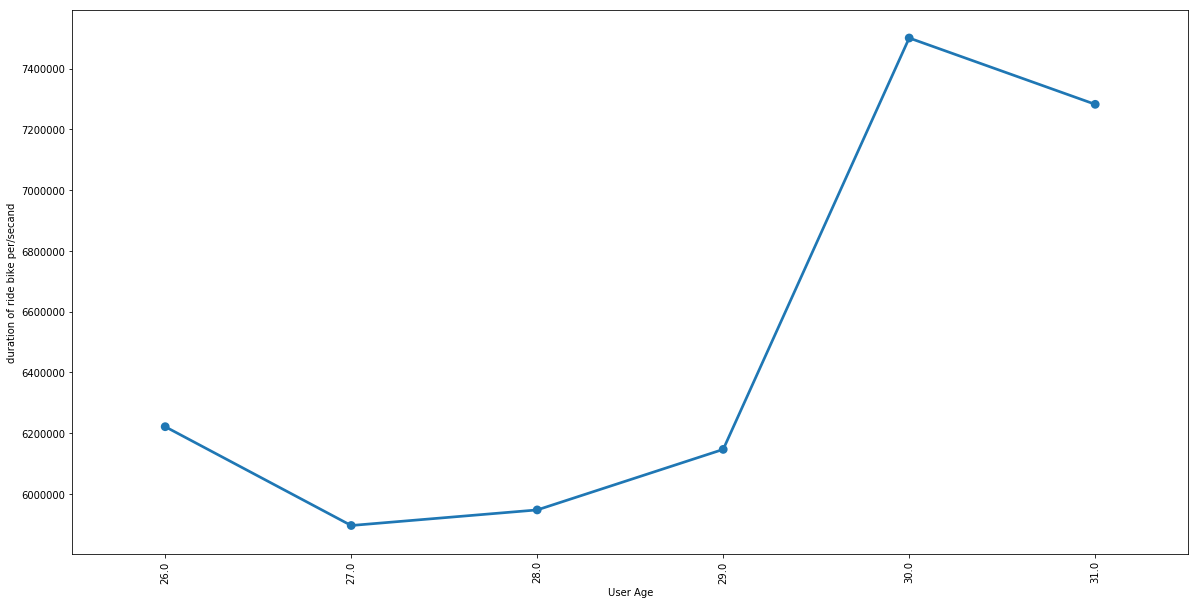

In [63]:
#pointplot age and duration_sec
sb.pointplot(data = better_duration, x = 'age', y = 'duration_sec')

#rotate words to be readable
plt.xticks(rotation = 90)

#name axis
plt.xlabel('User Age')
plt.ylabel('duration of ride bike per/secand')

In [64]:
count_age.query("age == 30")

,age,sum of values
2,30.0,8972


In [65]:
count_age.query("age == 31")

,age,sum of values
0,31.0,10236


30 and 31 ages is more productive when we talk to duration second; but it is not surprise because approxemately this 2 ages come to ride more than others especialy 31 years old with 10236 person.

# what range of ages counts duration second is above or equal mean?

In [66]:
count_age_duration['duration_sec'].mean()

1644541.2266666666

In [68]:
duration_mean = count_age_duration[count_age_duration["duration_sec"] >= 1644541.2266666666]

Text(0,0.5,'duration of ride bike per/secand')

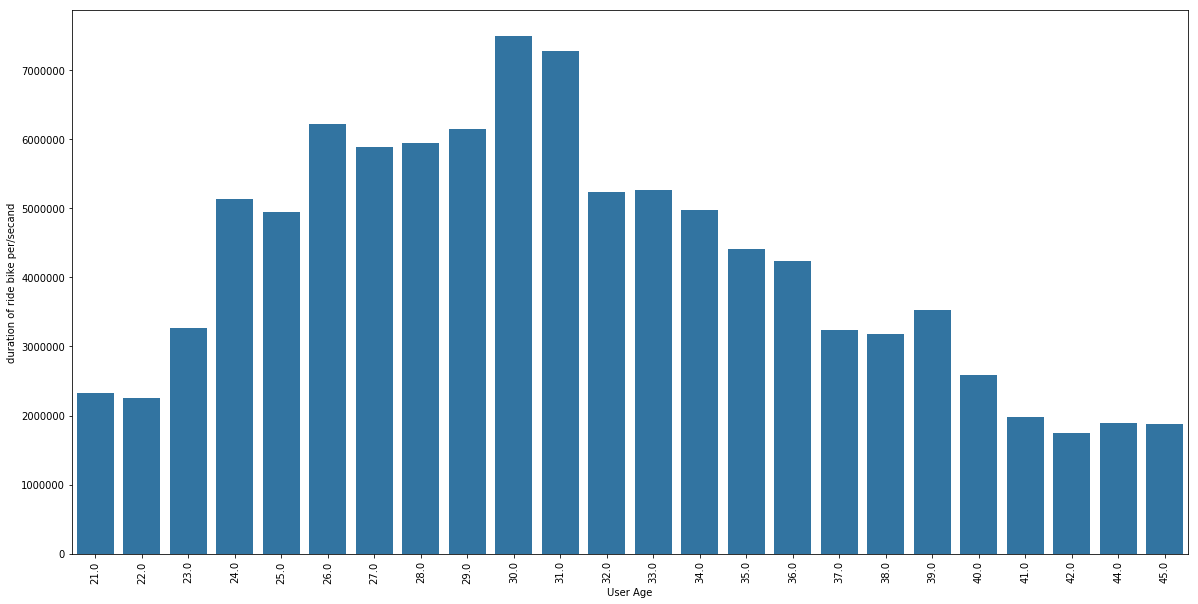

In [70]:
#barplot
sb.barplot(data = duration_mean, x = 'age', y = 'duration_sec', color = base_color)
plt.xticks(rotation = 90)
plt.xlabel('User Age')
plt.ylabel('duration of ride bike per/secand')

from 21 to 45 years old greater than or equal to the mean of duration second.

# Multivariate

# what size of half data as type customers ?
# and what size of half data as type supscribers when we talk about ages?

In [71]:
customer = df.query("user_type == 'Customer'")
subscriber = df.query("user_type == 'Subscriber'")

In [72]:
customer['age'].describe()

count    19868.000000
mean        33.729292
std          8.674753
min         18.000000
25%         28.000000
50%         34.000000
75%         36.000000
max        141.000000
Name: age, dtype: float64

In [73]:
subscriber['age'].describe()

count    163544.000000
mean         34.249965
std          10.021871
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         119.000000
Name: age, dtype: float64

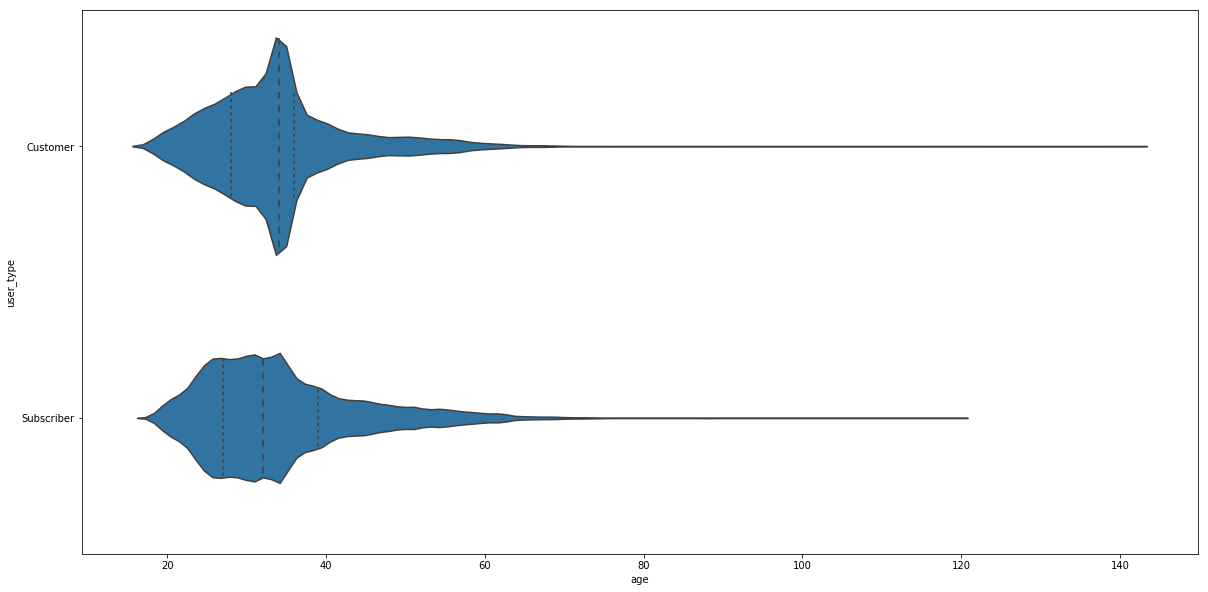

In [74]:
sb.violinplot(data = df, y = 'user_type', x = 'age', color = base_color, inner = 'quartile')

aproxemetly all of data combined between 20 and 40 years old<br>
half of customers between 28 and 36 years old<br>
half of subscribers between 27 and 39 years old

# what type is more productive?

# barplot customers and subscribers between ages and duration second

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 <a list of 76 Text xticklabel objects>)

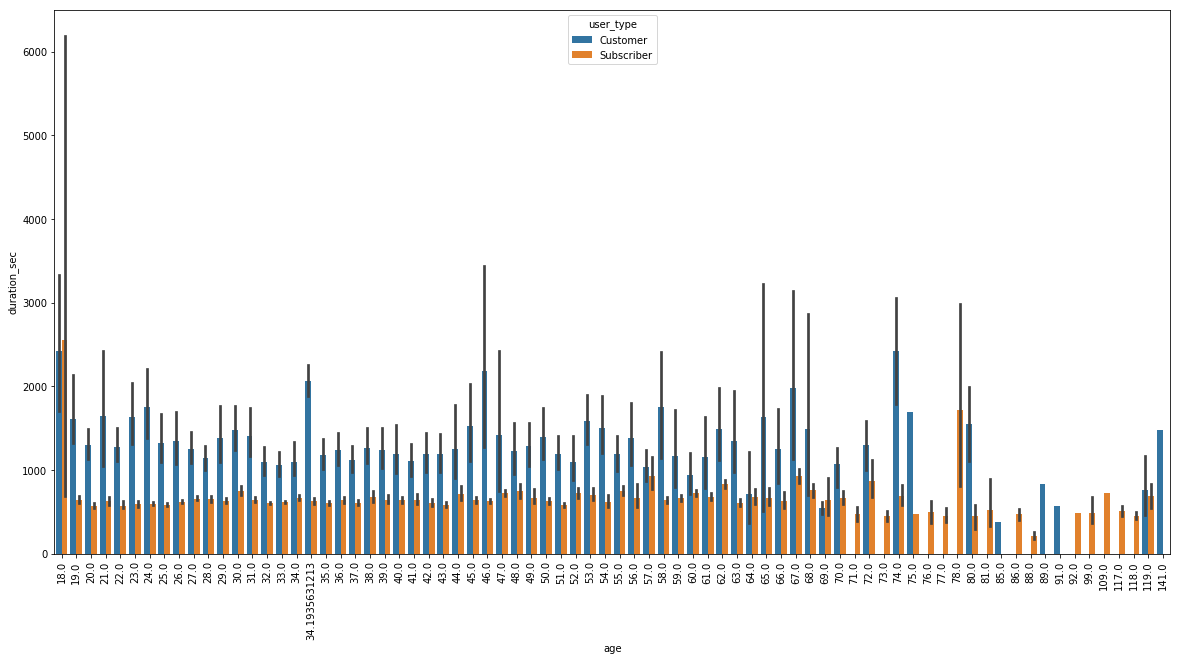

In [75]:
#barplot customers and subscribers between ages and duration second
sb.barplot(data=df, x='age',y='duration_sec', hue='user_type')
plt.xticks(rotation=90)

# pointplot types customers and supscripers between ages and duration second

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 <a list of 76 Text xticklabel objects>)

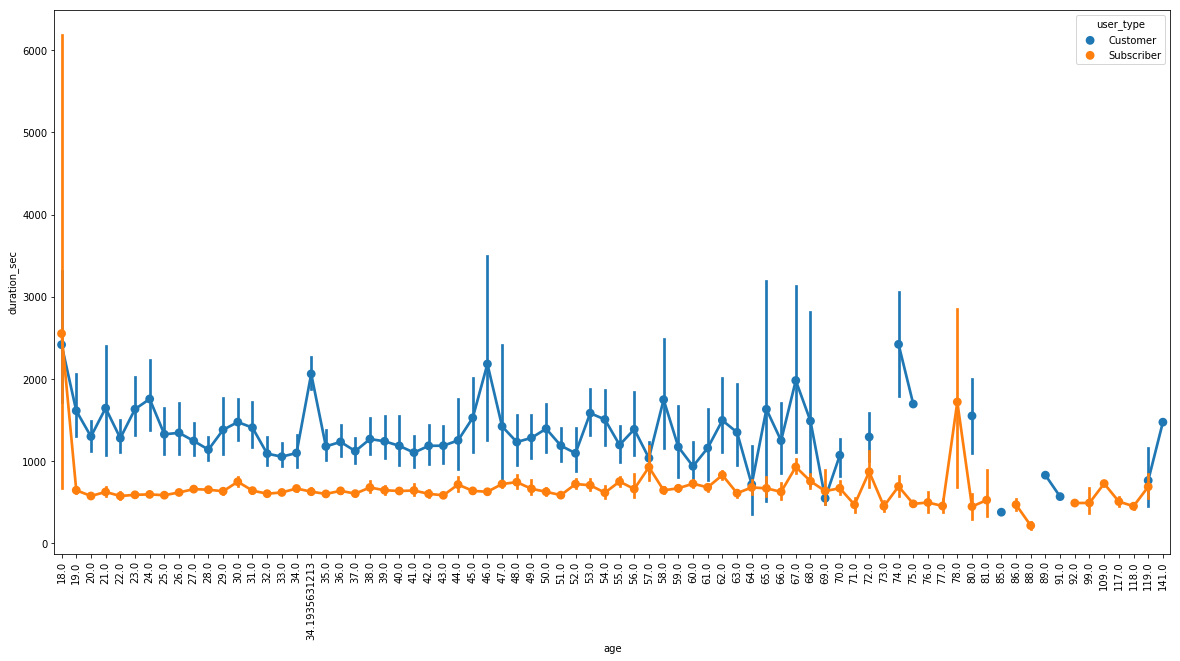

In [76]:
#pointplot types customers and supscripers between ages and duration second
sb.pointplot(data=df, x='age',y='duration_sec', hue='user_type')
plt.xticks(rotation=90)

we see now that customers are more productivity when we talk about duration second than subscribers.